In [132]:
!curl -O https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 96988  100 96988    0     0  98730      0 --:--:-- --:--:-- --:--:-- 98967


In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [134]:
data = pd.read_csv('mcdonalds.csv')
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [136]:
md_x = data.iloc[:, :11]
md_x = (md_x == "Yes").astype(int)
# average of each column
md_x.mean().round(2)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [137]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(md_x)

std_dev = np.sqrt(pca.explained_variance_)
var_prop = pca.explained_variance_ratio_
cumu_prop = np.cumsum(var_prop)

print("\tStandard Deviation\tProportion of Variance\tCumulative Proportion")
for i in range(len(std_dev)):
    print(f"PC{i+1}\t{std_dev[i]:.4f}\t\t\t{var_prop[i]:.4f}\t\t\t{cumu_prop[i]:.4f}")

	Standard Deviation	Proportion of Variance	Cumulative Proportion
PC1	0.7570			0.2994			0.2994
PC2	0.6075			0.1928			0.4922
PC3	0.5046			0.1330			0.6253
PC4	0.3988			0.0831			0.7084
PC5	0.3374			0.0595			0.7679
PC6	0.3103			0.0503			0.8182
PC7	0.2897			0.0438			0.8620
PC8	0.2751			0.0395			0.9016
PC9	0.2653			0.0368			0.9383
PC10	0.2488			0.0324			0.9707
PC11	0.2369			0.0293			1.0000


In [138]:
print("Standard Deviation: ")
for i in range(len(std_dev)):
    print(f"{std_dev[i]:.1f}", end="  ")
    
# Printing factor loadings
print("\n\nRotation: ")
print("Col Name ", end="")
for i in range(len(pca.components_)):
    print(f"\tPC{i+1}", end="   ")
print()
for i in range(len(md_x.columns)):
    print(f"{md_x.columns[i]:8}", end="")
    for j in range(len(pca.components_)):
        print(f"\t{'' if pca.components_[j][i] < 0 else ' '}{pca.components_[j][i]:.3f}", end="")
    print()

Standard Deviation: 
0.8  0.6  0.5  0.4  0.3  0.3  0.3  0.3  0.3  0.2  0.2  

Rotation: 
Col Name 	PC1   	PC2   	PC3   	PC4   	PC5   	PC6   	PC7   	PC8   	PC9   	PC10   	PC11   
yummy   	-0.477	 0.364	-0.304	 0.055	-0.308	 0.171	-0.281	 0.013	 0.572	-0.110	 0.045
convenient	-0.155	 0.016	-0.063	-0.142	 0.278	-0.348	-0.060	-0.113	-0.018	-0.666	-0.542
spicy   	-0.006	 0.019	-0.037	 0.198	 0.071	-0.355	 0.708	 0.376	 0.400	-0.076	 0.142
fattening	 0.116	-0.034	-0.322	-0.354	-0.073	-0.407	-0.386	 0.590	-0.161	-0.005	 0.251
greasy  	 0.304	-0.064	-0.802	 0.254	 0.361	 0.209	 0.036	-0.138	-0.003	 0.009	 0.002
fast    	-0.108	-0.087	-0.065	-0.097	 0.108	-0.595	-0.087	-0.628	 0.166	 0.240	 0.339
cheap   	-0.337	-0.611	-0.149	 0.119	-0.129	-0.103	-0.040	 0.140	 0.076	 0.428	-0.489
tasty   	-0.472	 0.307	-0.287	-0.003	-0.211	-0.077	 0.360	-0.073	-0.639	 0.079	 0.020
expensive	 0.329	 0.601	 0.024	 0.068	-0.003	-0.261	-0.068	 0.030	 0.067	 0.454	-0.490
healthy 	-0.214	 0.077	 0.192	 0.763	 0.288	

In [139]:
predictions = pca.transform(md_x)
predictions = pd.DataFrame(predictions, columns=[f"PC{i+1}" for i in range(predictions.shape[1])])
predictions.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


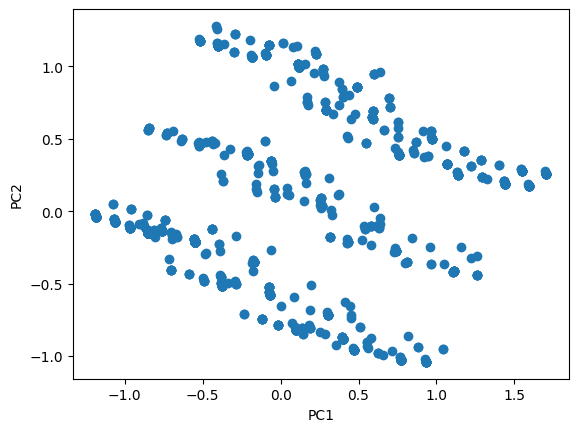

In [140]:

plt.scatter(predictions.iloc[:, 0], predictions.iloc[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show();

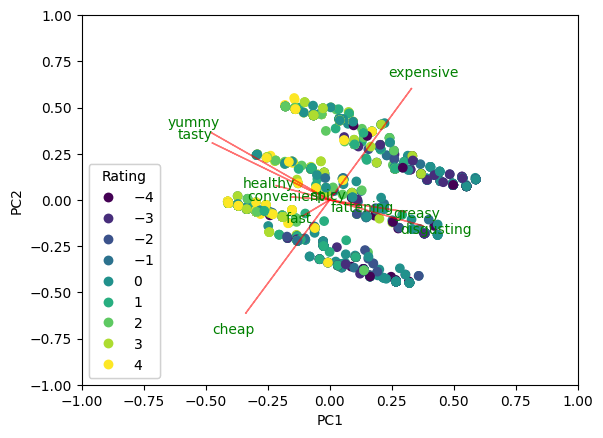

In [141]:
def cluster_plot(score, coeff, target, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    scatter = plt.scatter(xs * scalex,ys * scaley, c = target)
    legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower left",title="Rating")
    plt.gca().add_artist(legend1)

    
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
def intTryParse(value):
    try:
        return int(value), True
    except ValueError:
        return value, False

target = data["Like"].values
for i in range(len(target)):
    target[i], worked = intTryParse(target[i])
    if not worked:
        target[i] = 0
cluster_plot(predictions.values[:, 0:2], np.transpose(pca.components_[0:2, :]), target=target, labels=md_x.columns)


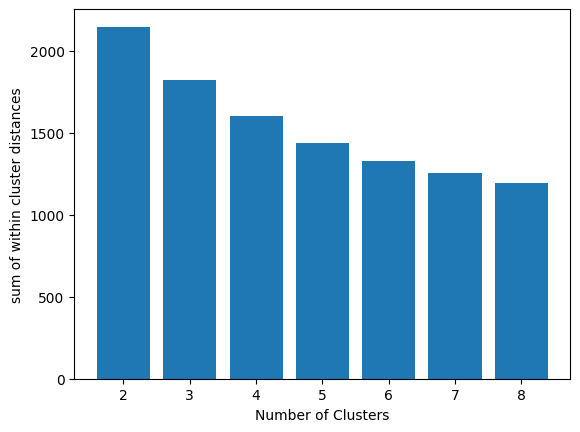

In [142]:
# We calculate solutions for two to eight market segments using standard k-means analysis with ten random restarts (argument nrep). We then relabel segment numbers such that they are consistent across segmentations.
from sklearn.cluster import KMeans

km28 = []

for i in range(2, 9):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(predictions)
    sum_of_distances = kmeans.inertia_
    km28.append((kmeans.labels_, sum_of_distances))
    
plt.bar(range(2, 9), [x[1] for x in km28])
plt.xlabel("Number of Clusters")
plt.ylabel("sum of within cluster distances")
plt.show();
    

In [161]:
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score, silhouette_score

nboot = 100
b28_result = {}
ari_scores = {}
silhouette_scores = {}



for i in range(2, 9):
    cluster_labels = {}
    ari_scores[i] = []
    silhouette_scores[i] = []

    initial_kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    initial_kmeans.fit(predictions)


    for j in range(nboot):
        print(f"Working on {i}th clusters, {j}/100 boot", end="\r")
        boot_data = resample(predictions, replace=True)
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
        kmeans.fit(boot_data)
        cluster_labels[j] = kmeans.labels_
        ari_scores[i].append(adjusted_rand_score(initial_kmeans.labels_, kmeans.labels_))
        silhouette_scores[i].append(silhouette_score(boot_data, kmeans.labels_))
        


    b28_result[i] = np.mean([
        adjusted_rand_score(cluster_labels[k], cluster_labels[l])
        for k in range(100)
        for l in range(i+1, 100)
    ]) / 100

print("Completed bootstrapping.")
    
b28_result

Completed bootstrapping. 99/100 boot


{2: 9.954360477264867e-05,
 3: 9.983306759665155e-05,
 4: 0.00010011973432623474,
 5: 9.970949603509926e-05,
 6: 9.981873741604057e-05,
 7: 0.00010033057861963656,
 8: 9.99526732570953e-05}

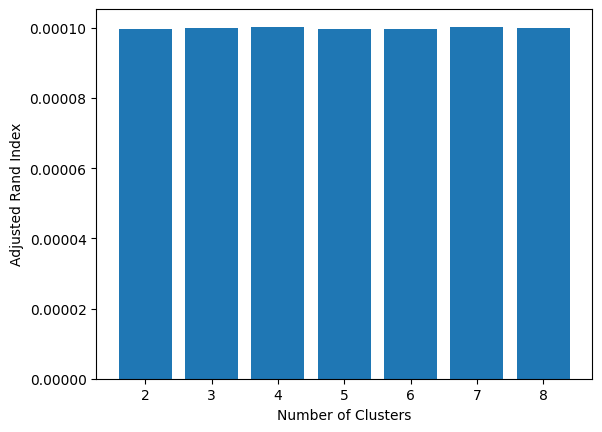

In [163]:
plt.bar(range(2, 9), [b28_result[i] for i in range(2, 9)])
plt.xlabel("Number of Clusters")
plt.ylabel("Adjusted Rand Index")
plt.show();

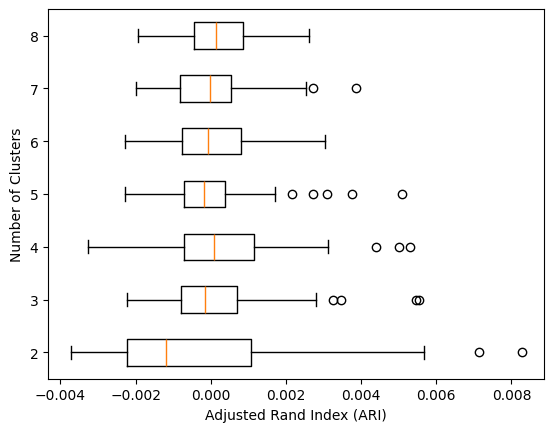

In [165]:
plt.boxplot(ari_scores.values(), labels=range(2,9), vert=False)
plt.xlabel('Adjusted Rand Index (ARI)')
plt.ylabel('Number of Clusters')
plt.show()


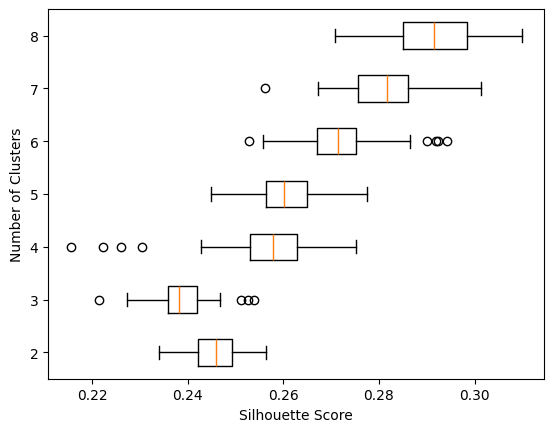

In [166]:
plt.figure()
plt.boxplot(silhouette_scores.values(), labels=range(2,9), vert=False)
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Clusters')
plt.show()
